In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling/Reading

In [17]:
data = pd.read_csv(r"C:\Users\CTTC1\Downloads\auto-mpg.data",header=None,delim_whitespace=True)   #make the whitespaces as column separator
data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [18]:
data.columns = ['mpg','cyclinders','displacement','horsepower','weight','accelaration','model_year','origin','car_name']     #column renaming
data

,mpg,cyclinders,displacement,horsepower,weight,accelaration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


# Data Cleaning

In [19]:
data.isnull().sum()    #total number of NULL elements in each column

mpg             0
cyclinders      0
displacement    0
horsepower      0
weight          0
accelaration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [20]:
data.describe(include='all')        #describes about all the numeric and string valued columns

,mpg,cyclinders,displacement,horsepower,weight,accelaration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [21]:
for i in data.columns:
    print(i,':',sum(data[i]=='?'))           #checks if the missing data denoted by '?' is present or not 

mpg : 0
cyclinders : 0
displacement : 0
horsepower : 6
weight : 0
accelaration : 0
model_year : 0
origin : 0
car_name : 0


In [22]:
d1 = data.describe(include='all')        #describes both the numeric and string columns and stores them in 'd1'

In [23]:
data['horsepower'].replace('?',d1['horsepower'][2],inplace=True)       #replacing '?' with the top repeated value

In [24]:
data

,mpg,cyclinders,displacement,horsepower,weight,accelaration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [25]:
for i in data.columns:
    print(i,':',sum(data[i]=='?'))

mpg : 0
cyclinders : 0
displacement : 0
horsepower : 0
weight : 0
accelaration : 0
model_year : 0
origin : 0
car_name : 0


In [26]:
data.dtypes

mpg             float64
cyclinders        int64
displacement    float64
horsepower       object
weight          float64
accelaration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [27]:
data['horsepower']=data['horsepower'].astype('float64')     #changing the datatype of the column to 'float64'

In [28]:
data.dtypes

mpg             float64
cyclinders        int64
displacement    float64
horsepower      float64
weight          float64
accelaration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

# Data Analysis

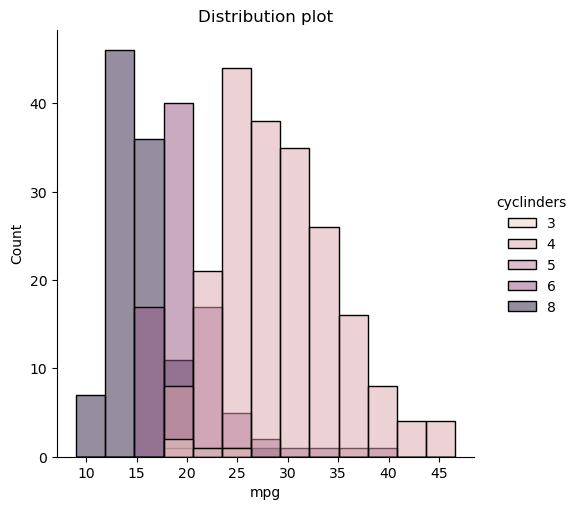

In [29]:
# relation between cyclinders and mpg

sns.displot(x=data.mpg,hue=data.cyclinders)
plt.title('Distribution plot')
plt.show()

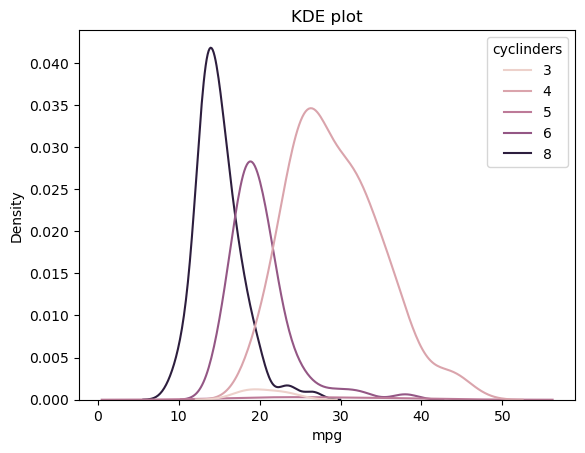

In [30]:
sns.kdeplot(x=data.mpg,hue=data.cyclinders)
plt.title('KDE plot')
plt.show()

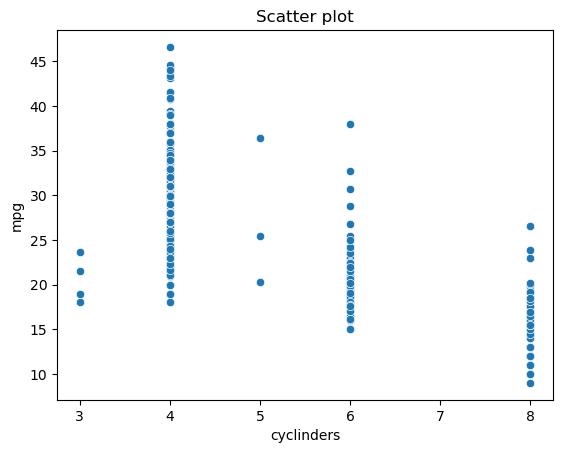

In [49]:
sns.scatterplot(x=data.cyclinders,y=data.mpg)
plt.title('Scatter plot')
plt.show()

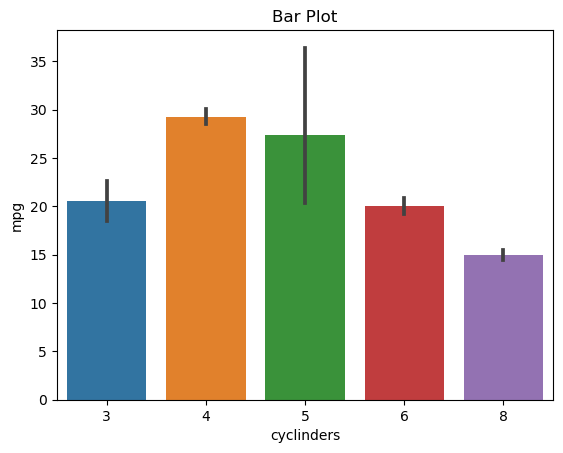

In [30]:
sns.barplot(x=data.cyclinders,y=data.mpg)
plt.title('Bar Plot')     #the black lines are the outliers
plt.show()

In [ ]:
sns.scatterplot(x=data.displacement,y=data.mpg)
plt.title('Scatter plot')
plt.show()

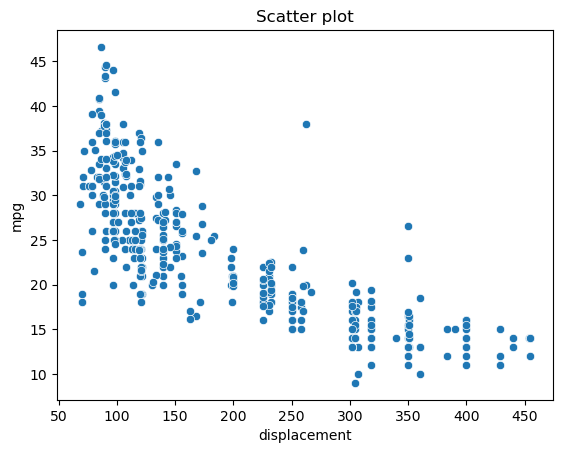

In [32]:
#relation between displacement and mpg

sns.scatterplot(x=data.displacement,y=data.mpg)
plt.title('Scatter plot')
plt.show()

C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


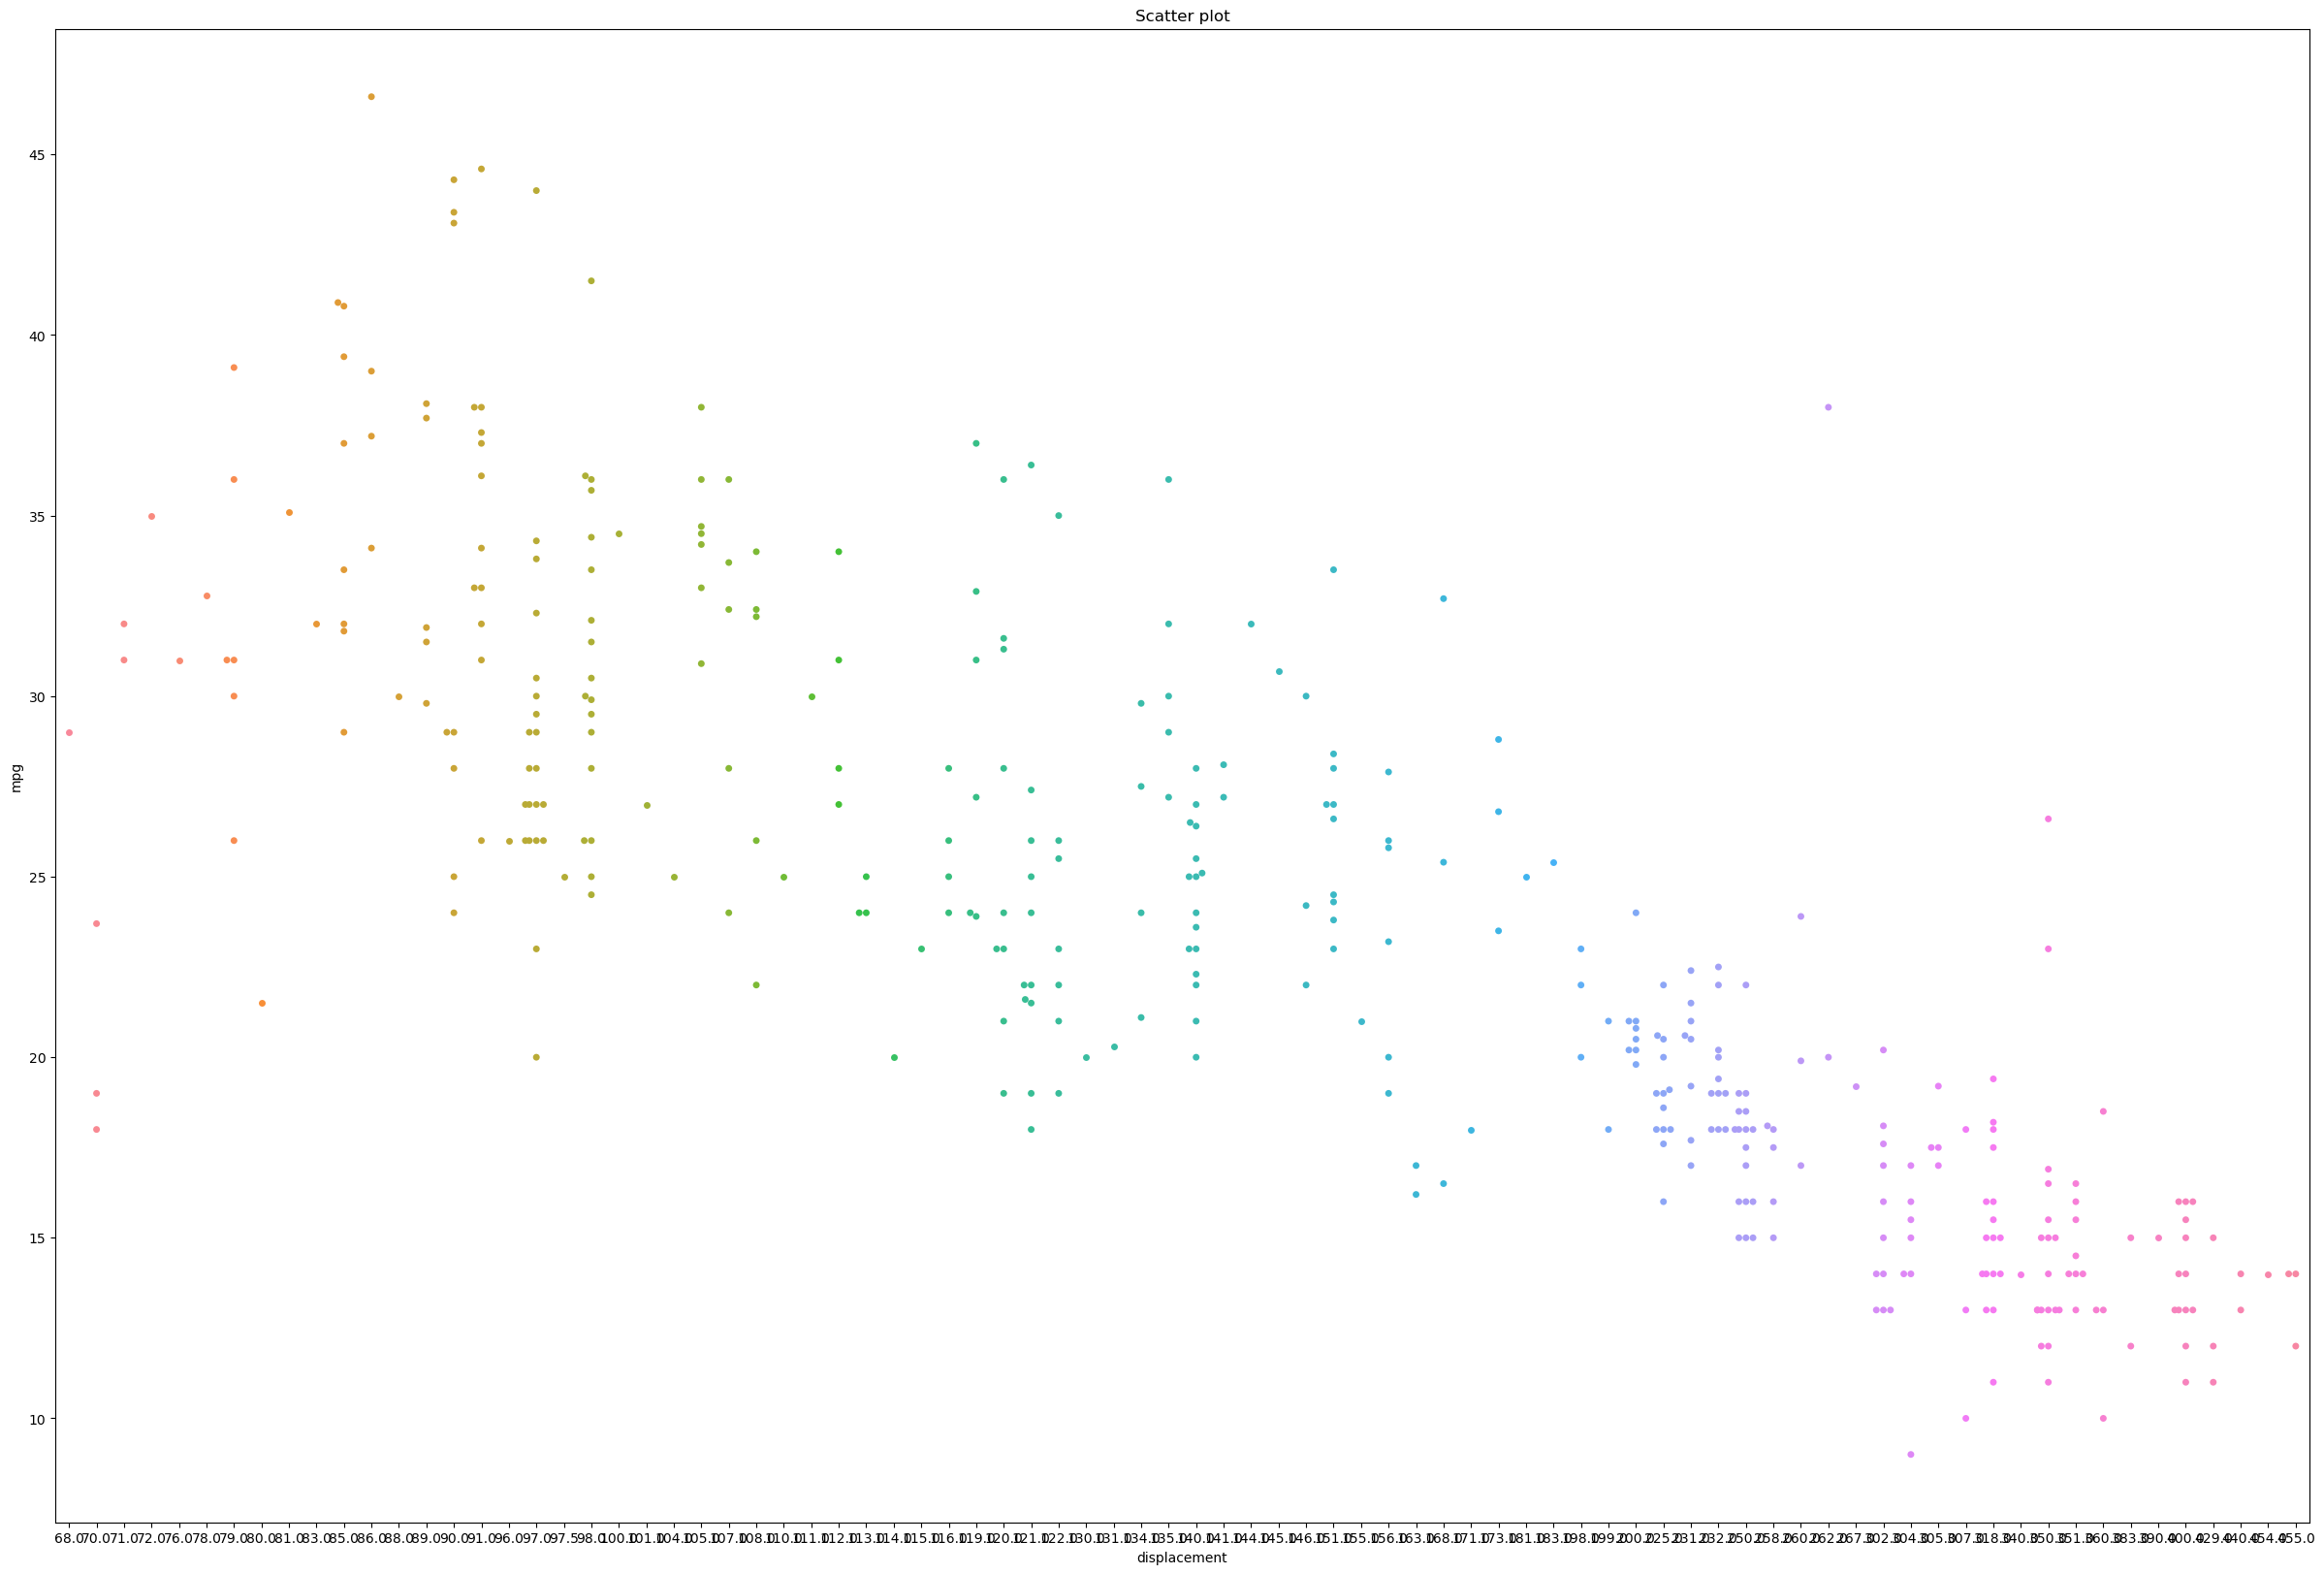

In [34]:
#relation between displacement and mpg

plt.figure(figsize=(30,20))
sns.swarmplot(x=data.displacement,y=data.mpg)
plt.title('Scatter plot')
plt.show()

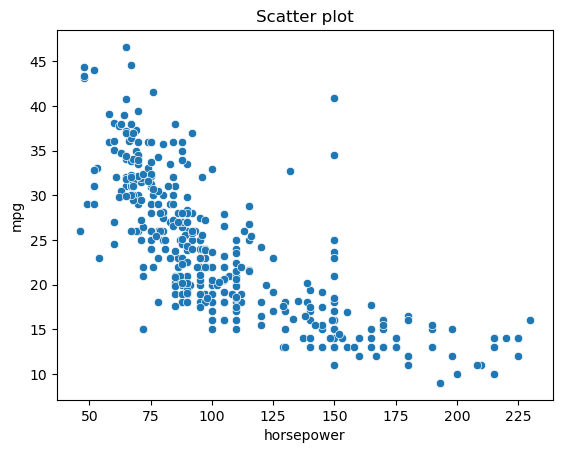

In [36]:
#relation between horsepower and mpg

sns.scatterplot(x=data.horsepower,y=data.mpg)
plt.title('Scatter plot')
plt.show()

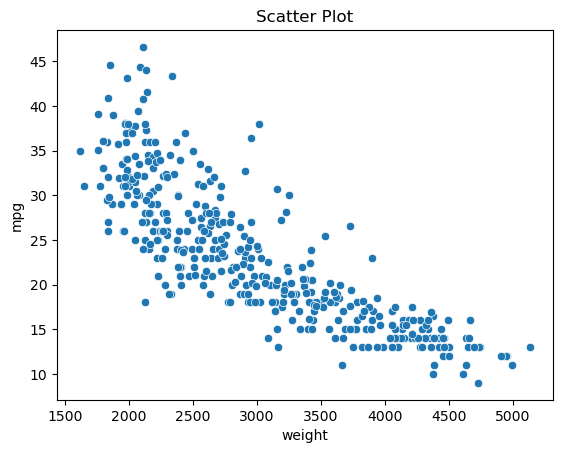

In [86]:
#relation between weight and mpg

sns.scatterplot(x=data.weight,y=data.mpg)
plt.title('Scatter Plot')
plt.show()

C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\Program Files\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


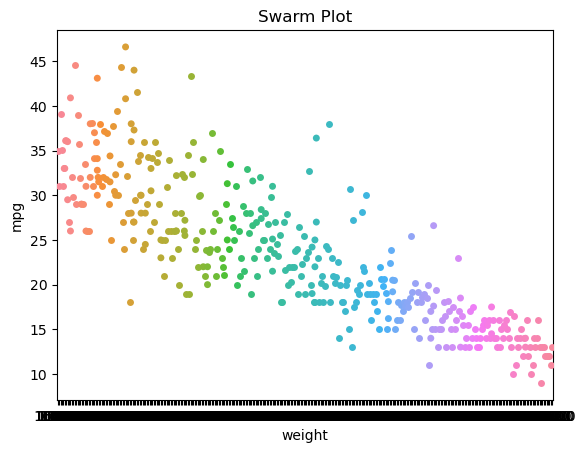

In [115]:

sns.swarmplot(x=data.weight,y=data.mpg)
plt.title('Swarm Plot')
plt.show()

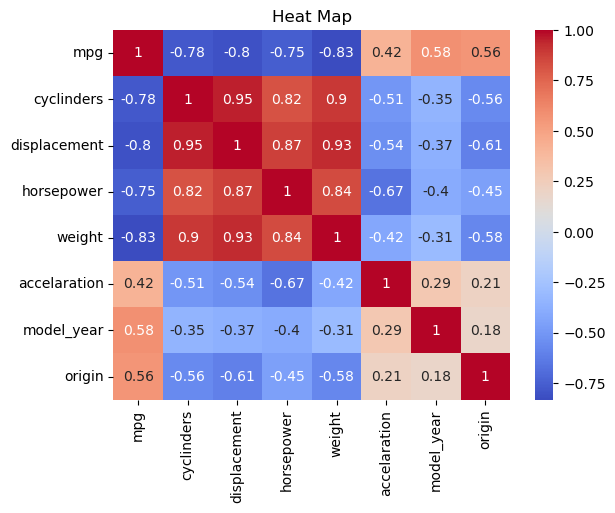

In [31]:
#heat map

cor = data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')     #cmap changes the colour coding of the heatmap
plt.title('Heat Map')
plt.show()

In [32]:
data.drop(['car_name'],axis=1,inplace=True)          #removing unwanted columns that are not needed for our ML model
data

,mpg,cyclinders,displacement,horsepower,weight,accelaration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


# IP/OP Creation

In [33]:
ip = data.drop('mpg',axis=1)        #all data column except 'mpg'
op = data.mpg                       #only the 'mpg' data

In [34]:
ip.head()


,cyclinders,displacement,horsepower,weight,accelaration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [35]:
op.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

# Train Test Split

In [46]:
#sklearn is ML library, scikit learn

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=5)
x_train
#x is input data and y is output data, divided into train and| test sets, total 4 parts
#test size of 0.2 denotes that 20% data is for test and 80% data is for training the model
#the splitted data is selected at random from the dataset, as by default 'random_state' is 'none'
#if you do not want a random selection, we can define 'random_state' with a specific value
#if the 'random_state' is 5, then the data taken during the 5th time is considered as constant

,cyclinders,displacement,horsepower,weight,accelaration,model_year,origin
225,6,250.0,110.0,3520.0,16.4,77,1
179,4,121.0,98.0,2945.0,14.5,75,2
260,6,225.0,110.0,3620.0,18.7,78,1
104,8,400.0,167.0,4906.0,12.5,73,1
209,4,120.0,88.0,3270.0,21.9,76,2
...,...,...,...,...,...,...,...
123,6,156.0,122.0,2807.0,13.5,73,3
64,8,318.0,150.0,4135.0,13.5,72,1
391,4,135.0,84.0,2370.0,13.0,82,1
270,4,134.0,95.0,2515.0,14.8,78,3


In [44]:
y_train

137    13.0
376    37.0
89     15.0
370    31.0
249    19.9
       ... 
36     19.0
309    41.5
79     26.0
246    32.8
155    15.0
Name: mpg, Length: 318, dtype: float64

# Standard Scaler

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
#brings all the data entries into one range, using the data from 'z', so that the data do not deviate from each other

In [125]:
x_train

array([[-0.88123371, -0.9965684 , -1.16587675, ...,  0.29624847,
         0.56790978,  1.76924978],
       [ 1.47365973,  1.75265115,  1.8381649 , ..., -1.43784006,
        -1.32455604, -0.70381145],
       [-0.88123371, -0.93066245, -0.5901021 , ...,  0.11930066,
         0.29755752, -0.70381145],
       ...,
       [ 1.47365973,  1.00885545,  0.33614407, ..., -0.58849057,
         0.02720526, -0.70381145],
       [-0.88123371, -0.53522676, -0.86547259, ..., -0.69465926,
         0.02720526, -0.70381145],
       [-0.88123371, -0.84592623, -0.79037155, ..., -0.41154277,
         1.37896656,  1.76924978]])

In [126]:
x_test

array([[-0.76200192, -0.25283059, -0.23657857, -0.31288508, -0.48530522,
         1.2512803 , -0.76334518],
       [-0.76200192, -0.95322174, -1.61989511, -0.99227637,  2.49490769,
         0.97627364,  0.53596576],
       [-0.76200192, -1.18668545, -1.5884561 , -1.26911244,  1.59676133,
        -0.94877298,  0.53596576],
       [-0.76200192, -0.67731007, -0.29945659, -0.94402054, -0.64860456,
        -1.4987863 ,  0.53596576],
       [ 1.60538269,  1.29651952,  0.92666489,  1.09034364, -0.89355356,
         0.70126698, -0.76334518],
       [ 0.42169038,  0.21409684, -0.45665165,  0.15697431,  1.06603849,
         0.70126698, -0.76334518],
       [-0.76200192, -0.96383372, -0.89679783, -1.11291594, -0.28118105,
         0.42626032,  0.53596576],
       [-0.76200192, -0.95322174, -1.61989511, -0.6748038 ,  3.31140438,
         0.97627364,  0.53596576],
       [ 0.42169038, -0.25283059,  0.7065918 , -0.07541561, -0.85272873,
        -0.94877298,  1.8352767 ],
       [-0.76200192, -0.4120

In [127]:
#over-fitting-> 100% trained model, the ML model is accurate in only the training, testing goes wrong, thus accuracy is low
#under-fitting-> untrained model, the ML is not trained properly, thus testing goes wrong, thus accuracy is low
#best-fit-> it just trained properly, mostly the points are covered, accuracy is more, not under-fitting nor over-fitting, line with the least sum of squares of errors(cost function for linear regression)

# ML model training

In [128]:
#linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [129]:
yp = lr.predict(x_test)

In [130]:
yp

array([27.75107989, 32.11601027, 27.67993575, 24.23989824, 18.87846305,
       23.98656006, 30.35413299, 30.46260853, 21.60354769, 25.12901494,
       24.5337477 , 33.9954746 , 24.33365701, 25.59361437, 31.98304033,
        8.50189718, 35.01870148, 33.11476924, 11.95618519, 34.29487282,
       27.37706632, 28.11288712, 18.12142934, 22.55172939, 14.35691976,
        6.77659763, 12.48269761, 28.20657211, 29.72232703, 13.43394489,
       18.99257042, 25.91956843, 24.01905176,  9.89897585, 19.1426067 ,
       11.01672907, 31.49376623, 28.6557777 , 20.00775582, 22.31475668,
       28.43533601, 16.40619558, 24.55840078, 33.96860739,  6.90569232,
       24.91982819, 24.25560517, 25.74336028, 14.89752161, 13.35958883,
       21.11632735, 27.99521781, 21.17883839, 31.55139815, 21.65654126,
       20.00800289, 15.94594118, 30.69888784, 24.21033772, 23.02835214,
       22.44744016, 31.72090721, 13.59071811, 22.42418158, 23.914091  ,
       25.05675381, 19.64193309, 23.11150587, 27.7512602 , 19.03

# Mean Squared Error